In [1]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from helpers import *

In [2]:
dev = qml.device("default.qutrit", wires=2)

In [3]:
n_samples = 100

X, y = make_blobs(
    n_samples=n_samples,
    centers=[[0.1, 0.2], [0.25, 0.4]], 
    cluster_std=0.05, 
    n_features=2,
    random_state=6
)

testX, testy = make_blobs(
    n_samples=50,
    centers=[[0.1, 0.2], [0.25, 0.4]], 
    cluster_std=0.05, 
    n_features=2,
    random_state=50
)

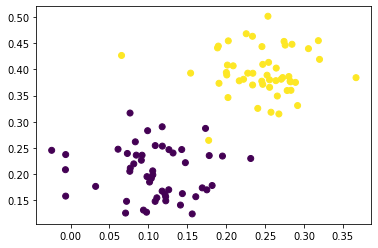

In [4]:
plot_data(X, y)

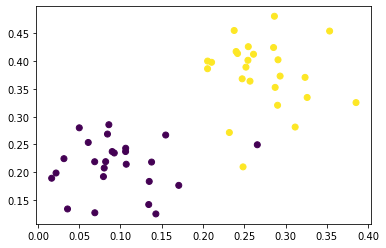

In [5]:
plot_data(testX, testy)

In [6]:
X = np.array(X, requires_grad=False)
y = np.array(y, requires_grad=False)
y[y == 0] = -1
testy[testy == 0] = -1

In [7]:
def rot(weights, wires):
    qml.TRY(weights[0], wires=wires, subspace=[0, 1])
    qml.TRY(weights[1], wires=wires, subspace=[0, 2])
    qml.TRY(weights[2], wires=wires, subspace=[0, 1])
    qml.TRZ(weights[3], wires=wires, subspace=[0, 2])
    qml.TRZ(weights[4], wires=wires, subspace=[0, 1])
    qml.TRY(weights[5], wires=wires, subspace=[0, 1])
    qml.TRY(weights[6], wires=wires, subspace=[0, 2])
    qml.TRY(weights[7], wires=wires, subspace=[0, 1])

obs = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]], requires_grad=False)
print(np.linalg.eigvalsh(obs))

@qml.qnode(dev)
def model_1(point, weights):
    qml.TRX(point[0], wires=0)
    qml.TRX(point[1], wires=1)

    rot(weights[0], 0)
    rot(weights[1], 1)
    qml.TAdd(wires=[1, 0])

    return qml.expval(qml.THermitian(obs, wires=0))

[-1.  1.  1.]


In [21]:
weights = np.random.normal(size=(2, 8))

In [22]:
weights

tensor([[-0.21227634,  0.5536455 , -1.07005543,  0.1583226 , -0.30204216,
          0.21221155,  0.10460251, -0.17070091],
        [-0.21576171, -0.39136033, -0.11759573,  0.75343725,  0.74151341,
         -1.54932534, -0.47862409,  0.20502291]], requires_grad=True)

In [23]:
model_1(X[0], weights)

tensor(-0.13930696, requires_grad=True)

In [24]:
our_preds = make_predictions(X, model_1, weights)

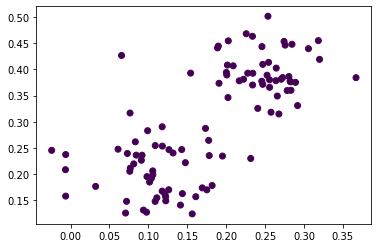

In [25]:
plot_data(X, our_preds)

In [26]:
loss = make_loss_function(X, y, model_1)

In [27]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

n_its = 100

loss_track = []

for it in range(n_its):
    weights, _loss = opt.step_and_cost(loss, weights)
    if it % 5 == 0:
        our_preds = make_predictions(X, model_1, weights)
        print(f"Loss at iteration {it:2} = {_loss: .10f}  Accuracy = {compute_accuracy(our_preds, y): .2f}")
    loss_track.append(_loss)

Loss at iteration  0 =  1.1532766588  Accuracy =  0.50
Loss at iteration  5 =  1.1173086534  Accuracy =  0.07
Loss at iteration 10 =  1.1028129042  Accuracy =  0.05
Loss at iteration 15 =  1.0881726594  Accuracy =  0.03
Loss at iteration 20 =  1.0730526848  Accuracy =  0.03
Loss at iteration 25 =  1.0580124124  Accuracy =  0.06
Loss at iteration 30 =  1.0435471632  Accuracy =  0.09
Loss at iteration 35 =  1.0299580631  Accuracy =  0.16
Loss at iteration 40 =  1.0173502343  Accuracy =  0.31
Loss at iteration 45 =  1.0056893097  Accuracy =  0.49
Loss at iteration 50 =  0.9948670655  Accuracy =  0.63
Loss at iteration 55 =  0.9847517638  Accuracy =  0.75
Loss at iteration 60 =  0.9752193887  Accuracy =  0.80
Loss at iteration 65 =  0.9661701346  Accuracy =  0.83
Loss at iteration 70 =  0.9575352227  Accuracy =  0.87
Loss at iteration 75 =  0.9492776029  Accuracy =  0.88
Loss at iteration 80 =  0.9413886508  Accuracy =  0.91
Loss at iteration 85 =  0.9338821592  Accuracy =  0.93
Loss at it

In [28]:
our_preds = make_predictions(X, model_1, weights)

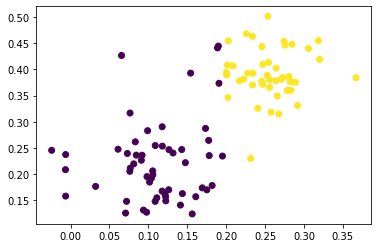

In [29]:
plot_data(X, our_preds)

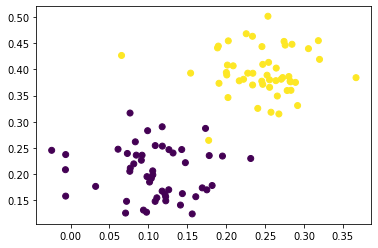

In [30]:
plot_data(X, y)
test_preds = make_predictions(testX, model_1, weights)

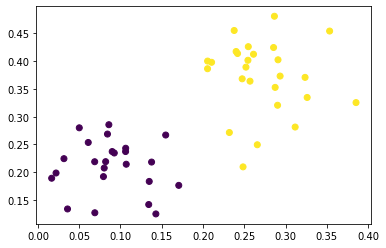

In [31]:
plot_data(testX, test_preds)

0.98

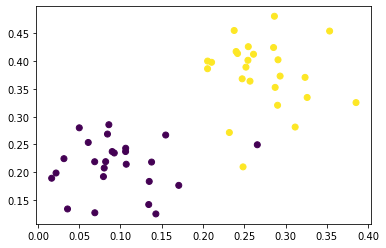

In [33]:
plot_data(testX, testy)
compute_accuracy(testy, test_preds)